In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

In [17]:
data=pd.read_csv("bank.csv")

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.shape

(4521, 17)

In [8]:
data_dup=data.duplicated().any()
print(data_dup)

False


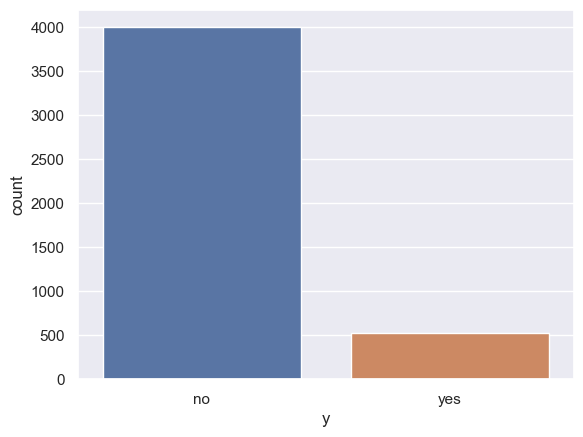

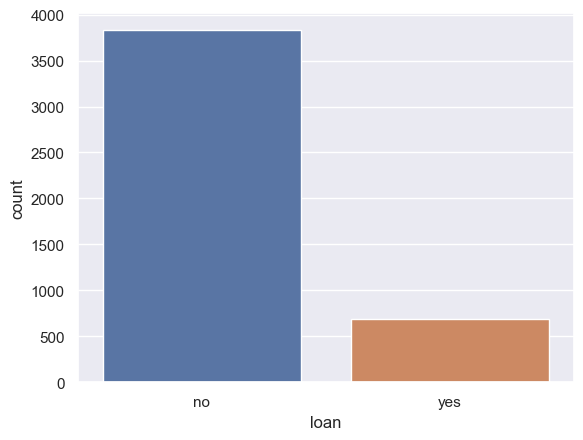

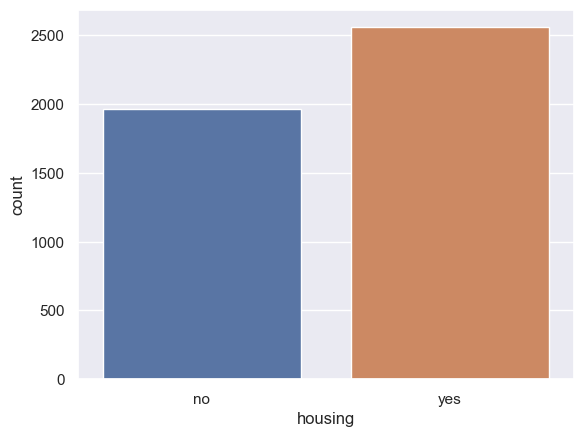

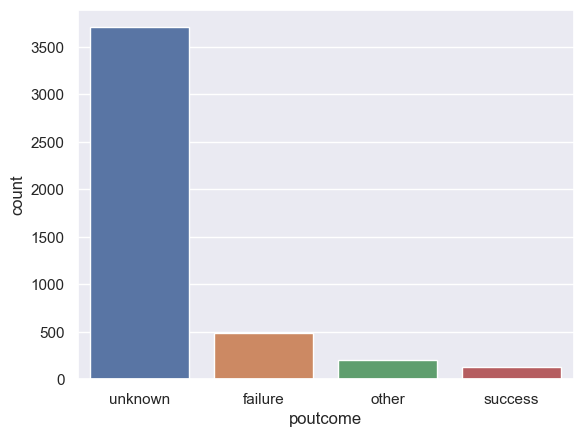

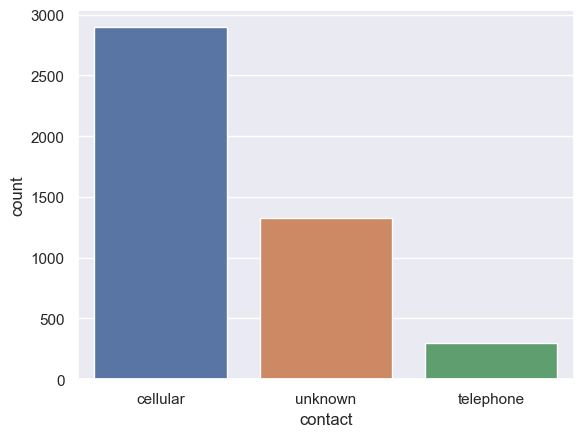

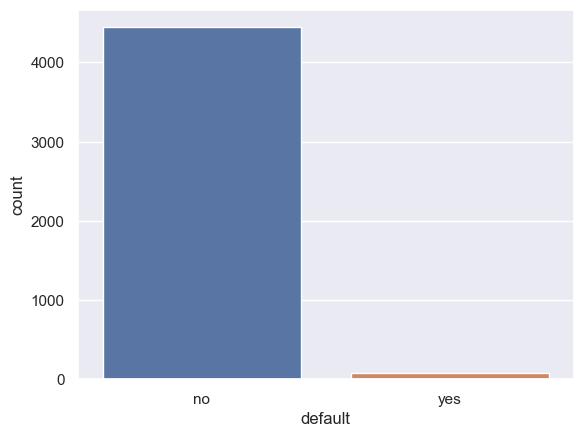

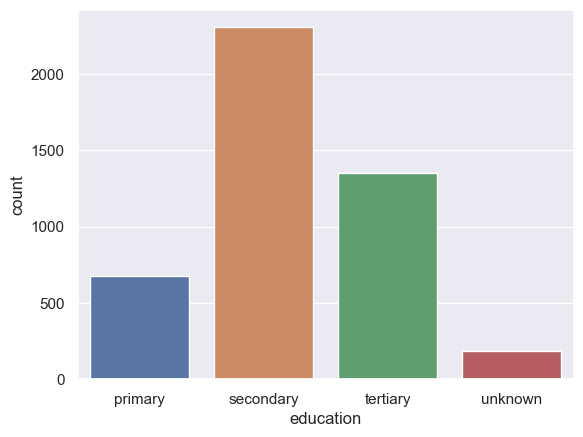

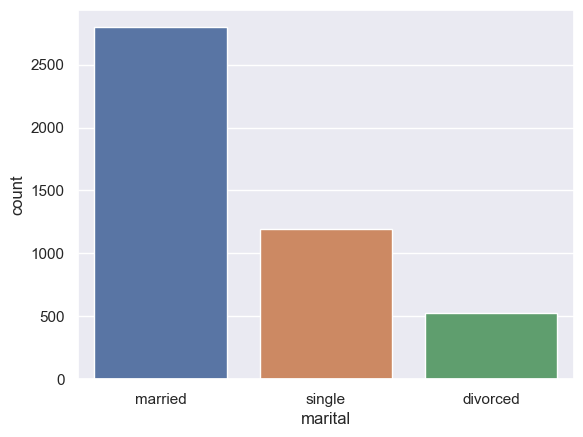

In [9]:
sns.countplot(x=data['y'])
plt.show()
sns.countplot(x=data['loan'])
plt.show()
sns.countplot(x=data['housing'])
plt.show()
sns.countplot(x=data['poutcome'])
plt.show()
sns.countplot(x=data['contact'])
plt.show()
sns.countplot(x=data['default'])
plt.show()
sns.countplot(x=data['education'])
plt.show()
sns.countplot(x=data['marital'])
plt.show()

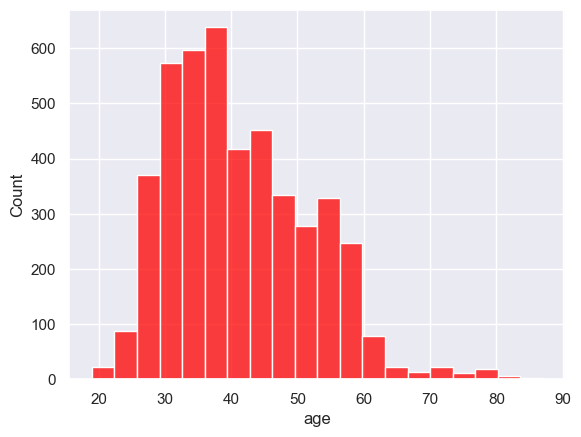

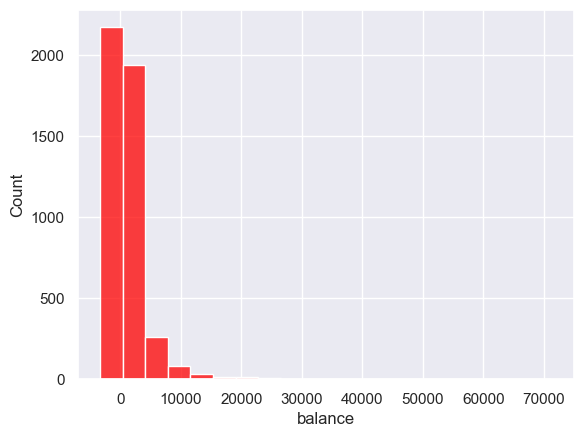

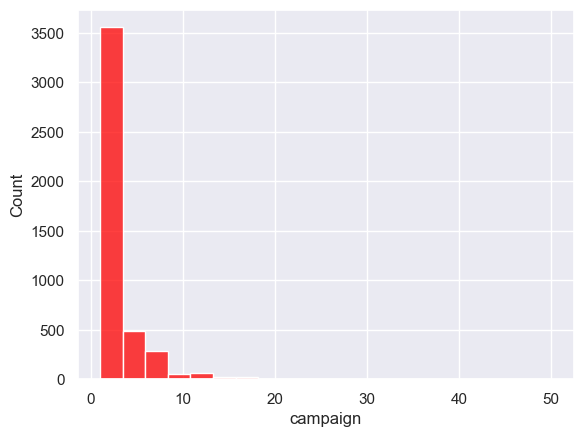

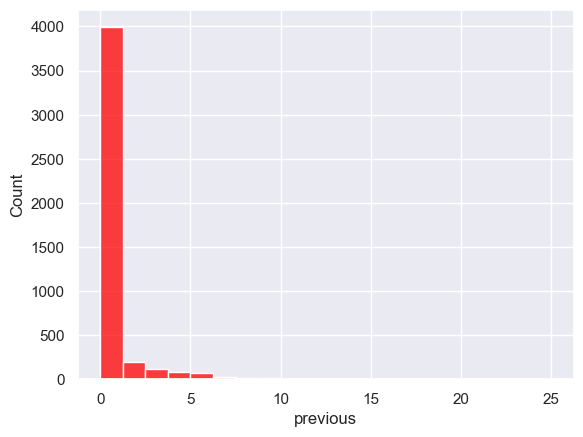

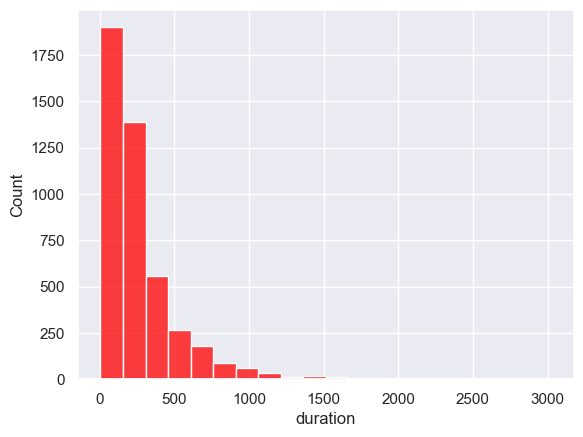

In [10]:
sns.histplot(data['age'],bins=20, stat="count",color='red')
plt.show()
sns.histplot(data['balance'],bins=20, stat="count",color='red')
plt.show()
sns.histplot(data['campaign'],bins=20, stat="count",color='red')
plt.show()
sns.histplot(data['previous'],bins=20, stat="count",color='red')
plt.show()
sns.histplot(data['duration'],bins=20, stat="count",color='red')
plt.show()

In [19]:
data.drop(['marital','education','default','contact','day','month','pdays','job'],axis=1,inplace=True)

In [20]:
cate_val=[]                                   # categorical columns
cont_val=[]                                   # numerical columns

for column in data.columns:
    if data[column].nunique() <=10:           # no of unique values less than 10 then it is categorical value
        cate_val.append(column)
    else:
        cont_val.append(column)

In [21]:
cate_val

['housing', 'loan', 'poutcome', 'y']

In [22]:
cont_val

['age', 'balance', 'duration', 'campaign', 'previous']

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[cont_val] = sc.fit_transform(data[cont_val])
data.head()

,age,balance,housing,loan,duration,campaign,previous,poutcome,y
0,-1.056270,0.121072,no,no,-0.711861,-0.576829,-0.320413,unknown,no
1,-0.772583,1.118644,yes,yes,-0.169194,-0.576829,2.041734,failure,no
2,-0.583458,-0.024144,yes,no,-0.303898,-0.576829,0.270124,failure,no
3,-1.056270,0.017726,yes,yes,-0.250017,0.387967,-0.320413,unknown,no
4,1.686036,-0.472753,yes,no,-0.146102,-0.576829,-0.320413,unknown,no


In [24]:
cate_val.remove('y')                           #already contain 0 and 1
data=pd.get_dummies(data,columns=cate_val,drop_first=True)     # remove dummy variable trap

In [25]:
data.head()

,age,balance,duration,campaign,previous,y,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.121072,-0.711861,-0.576829,-0.320413,no,False,False,False,False,True
1,-0.772583,1.118644,-0.169194,-0.576829,2.041734,no,True,True,False,False,False
2,-0.583458,-0.024144,-0.303898,-0.576829,0.270124,no,True,False,False,False,False
3,-1.056270,0.017726,-0.250017,0.387967,-0.320413,no,True,True,False,False,True
4,1.686036,-0.472753,-0.146102,-0.576829,-0.320413,no,True,False,False,False,True


In [27]:
X = data.drop('y',axis=1)                 #independent variables
y = data['y']                             #dependent variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt=DecisionTreeClassifier()

In [30]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred4=dt.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred4)

0.8410596026490066

In [33]:
new=pd.DataFrame({
    'age':30,
    'balance':1787,
    'duration':79,	
    'campaign':1,	
    'previous':0,
    'poutcome':'unknown',
},index=[0])

In [34]:
new

,age,balance,duration,campaign,previous,poutcome
0,30,1787,79,1,0,unknown


In [35]:
new = new.reindex(columns=X.columns, fill_value=0)
p = dt.predict(new)
if p[0] == 1:
    print("Person will deposit")
else:
    print("Person will not Survived")

Person will not Survived
